<a href="https://colab.research.google.com/github/PawelGradek/Projects/blob/main/RecruitmentTask_Pawe%C5%82Gradek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Technical qualitative analysis of data.

## 1. Using the pandas library to load the dataset.

In [1]:
#importing needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
#Read a comma-separated values (csv) file into DataFrame
PATH = 'https://bitpeak.pl/datasets/BCL_TaskCreation.csv'
df = pd.read_csv(PATH, delimiter=';' )

In [3]:
df.head()

,dataStream,rowCount,probingTimestamp
0,BCL_TaskCreation,315349655,2020-01-13 09:33:00.497
1,BCL_TaskCreation,315349655,2020-01-13 09:34:00.157
2,BCL_TaskCreation,314533770,2020-01-11 01:18:00.143
3,BCL_TaskCreation,289249872,2020-04-05 16:10:00.333
4,BCL_TaskCreation,289249872,2020-04-05 16:11:00.883


## 2. Data analysis.

### Data ordering

In [4]:
#Return if the index is monotonic increasing (only equal or increasing) values.
for i in df.columns:
  print(f'Whether the values in the: {i} column are increasing: {df[i].is_monotonic_increasing}')

Whether the values in the: dataStream column are increasing: True
Whether the values in the: rowCount column are increasing: False
Whether the values in the: probingTimestamp column are increasing: False


### Uniqueness of data

In [5]:
#Return unique values based on a hash table.
for i in df.columns:
  unique_values = df[i].unique()
  print(f'Column name: {i}\nUnique values: {unique_values}\nNumber of unique values: {len(unique_values)},\n')

Column name: dataStream
Unique values: ['BCL_TaskCreation']
Number of unique values: 1,

Column name: rowCount
Unique values: [315349655 314533770 289249872 ... 289702812 289702632 289702697]
Number of unique values: 6612,

Column name: probingTimestamp
Unique values: ['2020-01-13 09:33:00.497' '2020-01-13 09:34:00.157'
 '2020-01-11 01:18:00.143' ... '2020-05-02 06:10:00.157'
 '2020-05-02 04:18:00.117' '2020-05-02 06:11:00.597']
Number of unique values: 160513,



### Data continuity

In [6]:
#Detect missing values
print('The number of blank values in the columns:')
df.isnull().sum()

The number of blank values in the columns:


dataStream          0
rowCount            0
probingTimestamp    0
dtype: int64

### Change of value over time

In [7]:
#Sort by the values
df = df.sort_values('probingTimestamp')
df.head()

,dataStream,rowCount,probingTimestamp
3506,BCL_TaskCreation,314015548,2020-01-10 10:04:18.837
3505,BCL_TaskCreation,314015548,2020-01-10 10:16:29.063
3507,BCL_TaskCreation,314015548,2020-01-10 10:17:00.510
3512,BCL_TaskCreation,314015548,2020-01-10 10:18:00.977
3513,BCL_TaskCreation,314015548,2020-01-10 10:19:00.610


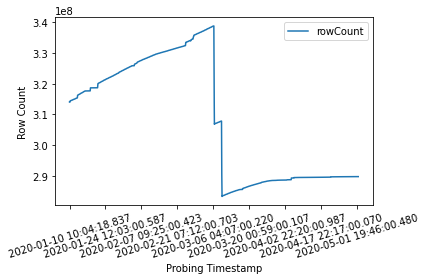

In [8]:
#Make plots of Series 
df.plot(x='probingTimestamp',y='rowCount')
plt.xticks(rotation=17, fontsize=10)
plt.xlabel("Probing Timestamp")
plt.ylabel("Row Count")
plt.tight_layout()

### Visible seasonality
In the chart above we can see a repeating cycle, in the middle of the timeline we know that the values are rising again as at the beginning of the chart.

Thanks to this observation, we may be inclined to propose a thesis that seasonality is visible in this data.

### Changes in adjacent records.

In [9]:
#Computing the magnitude of the order of change between adjacent records
diff = np.diff(df['rowCount'])
diffUnique = pd.unique(diff)

#Function to computing the magnitude of the order
def order_of_magnitude(number):
    return math.floor(math.log(number, 10))

magOfOrder = []
for i in diffUnique:
  if i != 0:
    magOfOrder.append(order_of_magnitude(abs(i)))
magOfOrderUnique = pd.unique(magOfOrder)
print(f'The magnitude of the order of the changes in adjacent records that occur in the dataset: {magOfOrderUnique}')


The magnitude of the order of the changes in adjacent records that occur in the dataset: [4 3 2 1 0 5]


### Duplicate values

In [10]:
#Return boolean Series denoting duplicate rows.
print(df.duplicated())

3506      False
3505      False
3507      False
3512      False
3513      False
          ...  
160365    False
160366    False
160369    False
160373    False
160058    False
Length: 160735, dtype: bool


## 3. Identifying potential data quality problems.

Potential data quality problems in this dataset:

- Ordering data - is the data ordered or the time series are sorted by time from the oldest date to the newest
- Data uniqueness - are the values in the time column unique, or are the information about the size of the streamed values unambiguous
- Continuity of data - Whether there are empty or null values in the time series
- Duplicate values - whether there are duplicate records in the dataset

## 4. Implementation of functions verifying the occurrence of problems.

### 1. Ordering data

In [11]:
#Function to return if the index is monotonic increasing values.
def verification_of_data_ordering(DataFrame):
  for i in DataFrame.columns:
    print(f'Whether the values in the: {i} column are increasing: {DataFrame[i].is_monotonic_increasing}\n')

### 2. Data uniqueness

In [12]:
#Function to return unique values based on a hash table.
def verification_of_data_uniqueness(DataFrame):
  for i in DataFrame.columns:
    uniqueValues = DataFrame[i].unique()
    print(f'Column name: {i}\nUnique values:{uniqueValues}\nNumber of unique values {len(uniqueValues)},\n')

### 3. Continuity of data

In [13]:
#Function to detect missing values
def verification_of_data_continuity(DataFrame):
  print(f'The number of blank values in the columns:\n{DataFrame.isnull().sum()}')
  nan_rows = DataFrame[DataFrame.isna().any(axis=1)]
  print(f'Records with blank values:\n{nan_rows}')

### 4. Duplicate values

In [14]:
#Function to return boolean Series denoting duplicate rows.
def verification_of_duplicate_values(DataFrame):
  print(f'Duplicate records in the dataset:\n{DataFrame.duplicated()}')

### Demonstration of the function's operation

In [15]:
PATH = 'https://bitpeak.pl/datasets/BCL_TaskCreation.csv'
DataFrame = pd.read_csv(PATH, delimiter=';' )
verification_of_data_ordering(DataFrame)
verification_of_data_uniqueness(DataFrame)
verification_of_data_continuity(DataFrame)
verification_of_duplicate_values(DataFrame)

Whether the values in the: dataStream column are increasing: True

Whether the values in the: rowCount column are increasing: False

Whether the values in the: probingTimestamp column are increasing: False

Column name: dataStream
Unique values:['BCL_TaskCreation']
Number of unique values 1,

Column name: rowCount
Unique values:[315349655 314533770 289249872 ... 289702812 289702632 289702697]
Number of unique values 6612,

Column name: probingTimestamp
Unique values:['2020-01-13 09:33:00.497' '2020-01-13 09:34:00.157'
 '2020-01-11 01:18:00.143' ... '2020-05-02 06:10:00.157'
 '2020-05-02 04:18:00.117' '2020-05-02 06:11:00.597']
Number of unique values 160513,

The number of blank values in the columns:
dataStream          0
rowCount            0
probingTimestamp    0
dtype: int64
Records with blank values:
Empty DataFrame
Columns: [dataStream, rowCount, probingTimestamp]
Index: []
Duplicate records in the dataset:
0         False
1         False
2         False
3         False
4        